In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_excel('./Concrete_Data.xls')
data.shape

In [36]:
target = 'Concrete compressive strength (MPa)'

In [ ]:
data.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
    'Age (day)': 'Age',
    'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength (MPa)'
}, inplace=True)

In [ ]:
data.head()

In [24]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength (MPa)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [37]:
data.corr()[target]

Cement                                 0.497833
Blast Furnace Slag                     0.134824
Fly Ash                               -0.105753
Water                                 -0.289613
Superplasticizer                       0.366102
Coarse Aggregate                      -0.164928
Fine Aggregate                        -0.167249
Age                                    0.328877
Concrete compressive strength (MPa)    1.000000
Name: Concrete compressive strength (MPa), dtype: float64

In [27]:
data.isnull().sum()

Cement                                 0
Blast Furnace Slag                     0
Fly Ash                                0
Water                                  0
Superplasticizer                       0
Coarse Aggregate                       0
Fine Aggregate                         0
Age                                    0
Concrete compressive strength (MPa)    0
dtype: int64

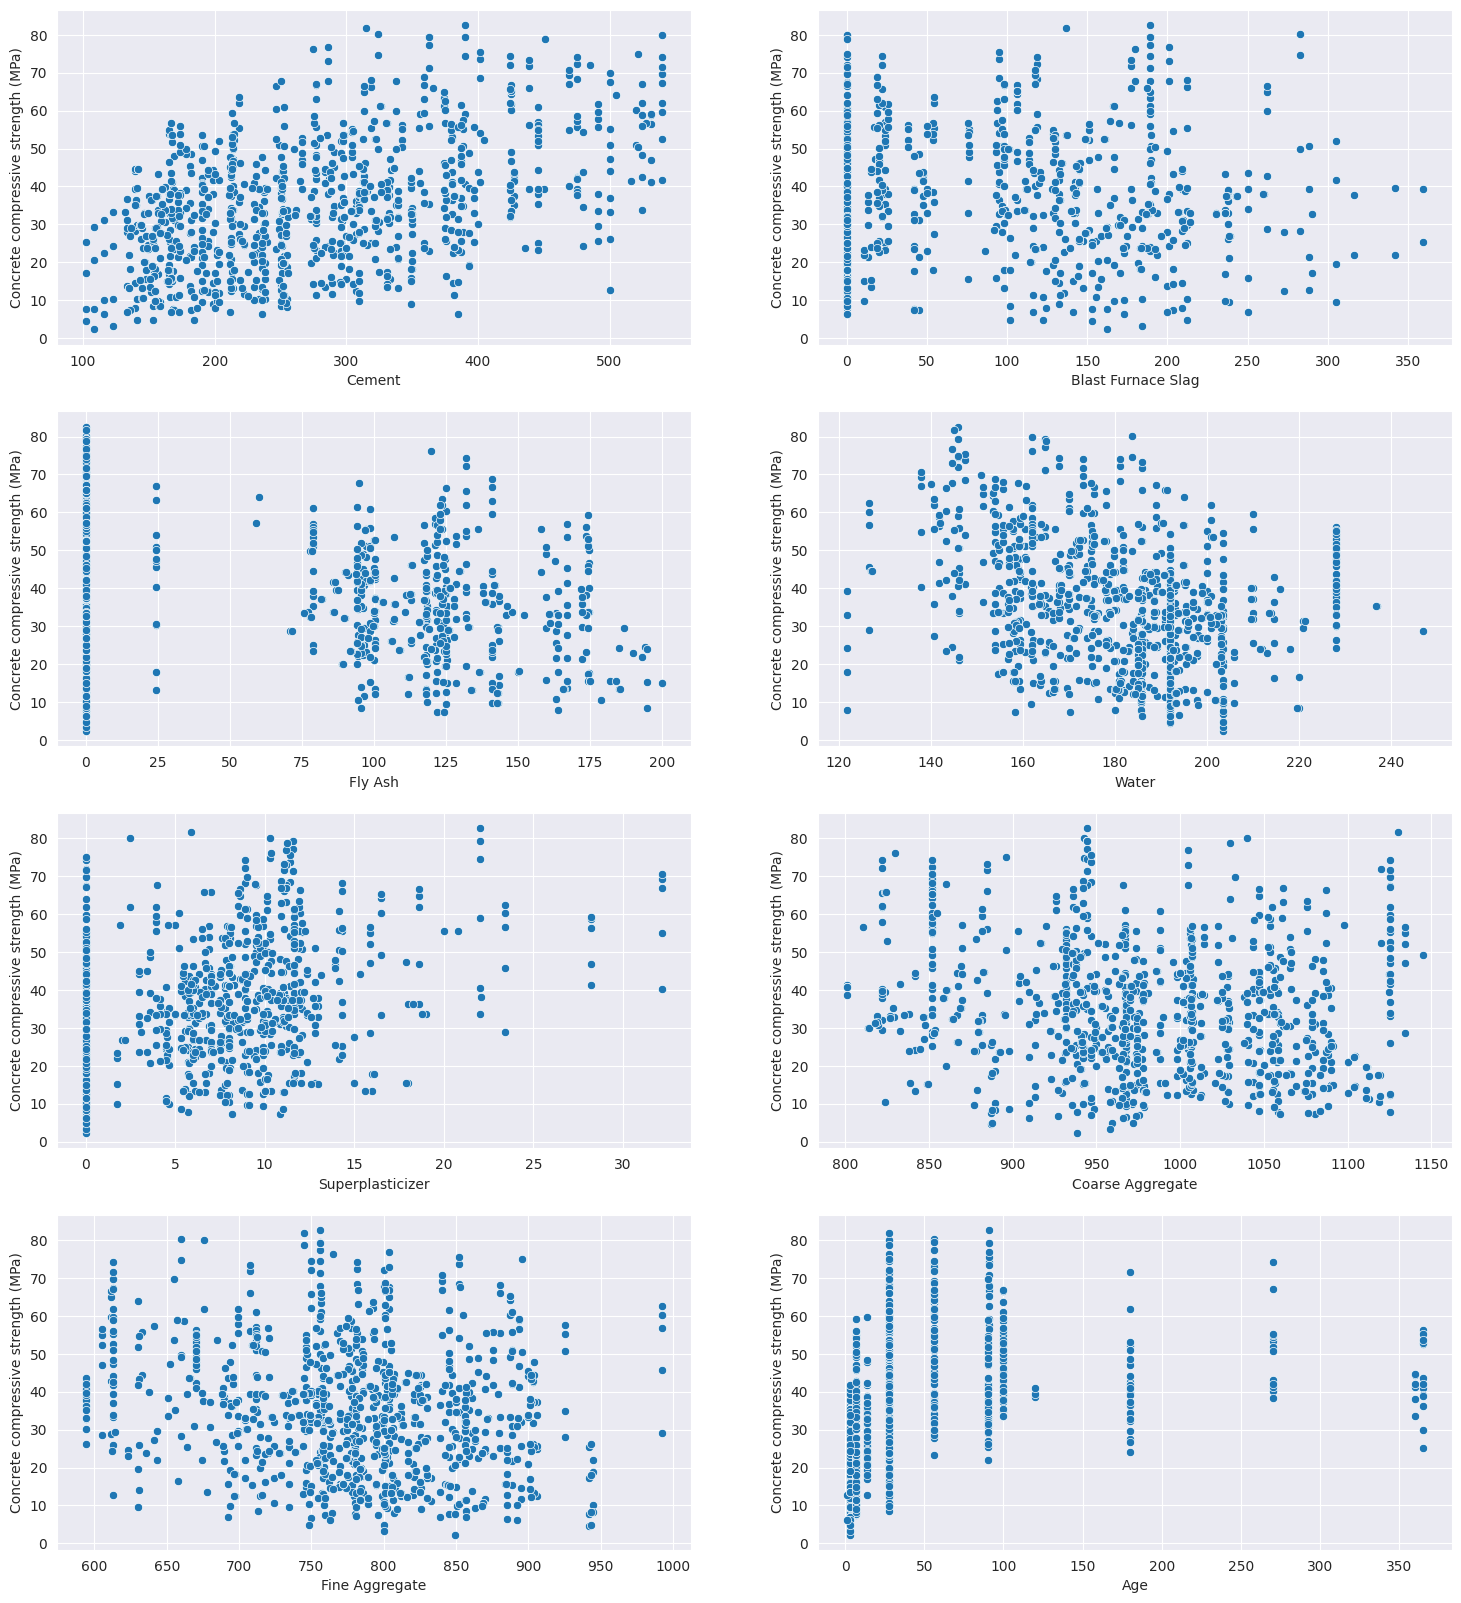

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

# Extract feature names excluding the target
features = data.columns.drop(target)

# Iterate over each feature and corresponding subplot axis
for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y=target, ax=axes[i])

plt.show()

<Axes: >

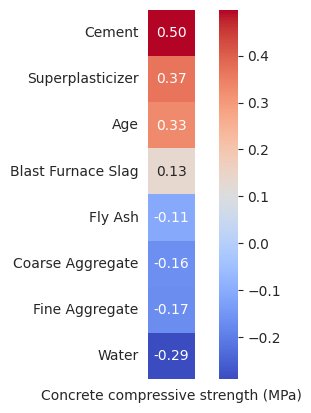

In [38]:
corr = data.corr()[[target]].drop(target).sort_values(by=target, ascending=False)

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

In [ ]:
meaningful_cols = data.corr()[target].where(lambda x: abs(x) > 0.2).dropna().index.to_list()

In [ ]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

In [ ]:
test_set['Concrete compressive strength (MPa)'].head()

In [ ]:
linearReg = LinearRegression()
linearReg.fit(
    train_set[meaningful_cols],
    train_set['Concrete compressive strength (MPa)'])

In [ ]:
linearReg.predict(test_set[meaningful_cols].iloc[0:5])

In [ ]:
y_pred = linearReg.predict(test_set[meaningful_cols])
y_true = test_set['Concrete compressive strength (MPa)']

<Axes: xlabel='Concrete compressive strength (MPa)'>

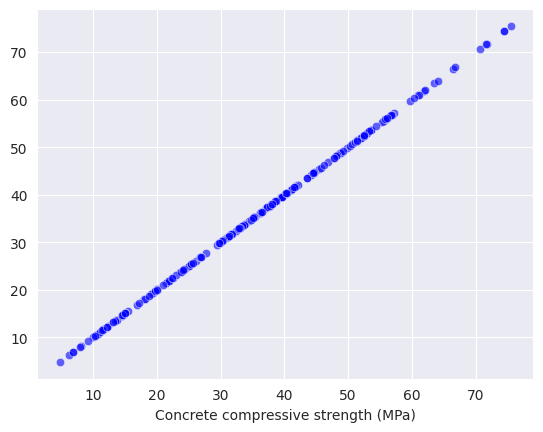

In [41]:
sns.scatterplot(x=y_true, y=y_pred, color='blue', alpha=0.6)

In [49]:
# Calculate accuracy metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 8.821422556827457e-15
Mean Squared Error (MSE): 1.2242661718405703e-28
R-squared (R²): 1.0
